In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA

WEATHER_GROUPS = {
    0: "Quang đãng",
    1: "Sương mù",
    2: "Mưa nhẹ",
    3: "Mưa",
    4: "Tuyết",
    5: "Mưa Lơn",
    6: "Bão",
}

WEATHER_CODE_MAPPING = {
    0: 0, 1: 0, 2: 0, 3: 0,  
    45: 1, 48: 1,             
    51: 2, 53: 2, 55: 2, 56: 2, 57: 2, 
    61: 3, 63: 3, 65: 3, 66: 3, 67: 3,  
    71: 4, 73: 4, 75: 4, 77: 4,  
    80: 5, 81: 5, 82: 5, 85: 5, 86: 5,  
    95: 6, 96: 6, 99: 6  
}

data = pd.read_csv("load.csv")

data['weather_group'] = data['weather_code'].map(WEATHER_CODE_MAPPING)
data.to_csv('load.csv')
data.head()


,Unnamed: 0,date,temperature,relative_humidity,dew_point,apparent_temperature,surface_pressure,wind_speed,precipitation,cloudcover,weather_code,weather_group
0,0,2024-01-01 05:00:00+00:00,1.5725,75.5763,-2.2775,-2.1702,1009.8789,8.8548,0.0,100.0,3.0,0
1,1,2024-01-01 06:00:00+00:00,2.5725,74.1006,-1.5775,-1.4437,1009.9020,11.3842,0.0,100.0,3.0,0
2,2,2024-01-01 07:00:00+00:00,2.6725,74.3913,-1.4275,-1.0761,1010.0037,9.6933,0.0,100.0,3.0,0
3,3,2024-01-01 08:00:00+00:00,2.5225,75.7412,-1.3275,-0.9782,1009.8015,8.0900,0.0,65.0,2.0,0
4,4,2024-01-01 09:00:00+00:00,0.4725,88.3674,-1.2275,-2.9309,1009.5552,7.5170,0.0,91.0,3.0,0


In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16848.0,8423.500000,4863.743003,0.0000,4211.750000,8423.50000,12635.250000,16847.0000
temperature,16848.0,13.107908,10.103386,-16.8775,5.022500,13.77250,21.272500,40.1725
relative_humidity,16848.0,67.452031,19.015406,15.0983,52.470100,67.92785,83.658225,100.0000
dew_point,16848.0,6.574957,9.939335,-22.2275,-0.527500,7.52250,14.572500,24.5725
apparent_temperature,16848.0,11.401134,12.428793,-21.5116,1.251550,11.66225,21.330650,44.3088
surface_pressure,16848.0,1010.343910,7.698555,976.6310,1005.921275,1010.30890,1015.256250,1042.4696
wind_speed,16848.0,11.165060,6.071791,0.0000,6.720500,10.12010,14.652000,57.2954
precipitation,16848.0,0.139055,0.737381,0.0000,0.000000,0.00000,0.000000,19.8000
cloudcover,16848.0,56.114732,43.494577,0.0000,4.000000,70.00000,100.000000,100.0000
weather_code,16848.0,9.274691,19.151945,0.0000,0.000000,2.00000,3.000000,75.0000


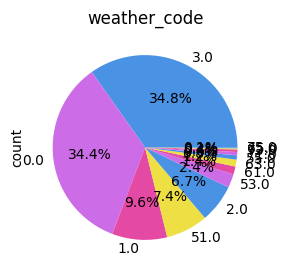

In [27]:
cat_col = [var for var in data.columns if data[var].dtypes =="object"]
cat_col

plt.figure(figsize=(5,3))
plt.title("weather_code")
data["weather_code"].value_counts().plot(kind = 'pie',autopct='%1.1f%%', colors=['#4A92E4','#CC6CE7','#E44AA4','#EDDF44'])
plt.show()

In [28]:
from sklearn.calibration import LabelEncoder
data = data.copy()
encode = LabelEncoder()
for var in cat_col:
    data[var] = encode.fit_transform(data[var])
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16848.0,8423.500000,4863.743003,0.0000,4211.750000,8423.50000,12635.250000,16847.0000
date,16848.0,8423.500000,4863.743003,0.0000,4211.750000,8423.50000,12635.250000,16847.0000
temperature,16848.0,13.107908,10.103386,-16.8775,5.022500,13.77250,21.272500,40.1725
relative_humidity,16848.0,67.452031,19.015406,15.0983,52.470100,67.92785,83.658225,100.0000
dew_point,16848.0,6.574957,9.939335,-22.2275,-0.527500,7.52250,14.572500,24.5725
apparent_temperature,16848.0,11.401134,12.428793,-21.5116,1.251550,11.66225,21.330650,44.3088
surface_pressure,16848.0,1010.343910,7.698555,976.6310,1005.921275,1010.30890,1015.256250,1042.4696
wind_speed,16848.0,11.165060,6.071791,0.0000,6.720500,10.12010,14.652000,57.2954
precipitation,16848.0,0.139055,0.737381,0.0000,0.000000,0.00000,0.000000,19.8000
cloudcover,16848.0,56.114732,43.494577,0.0000,4.000000,70.00000,100.000000,100.0000


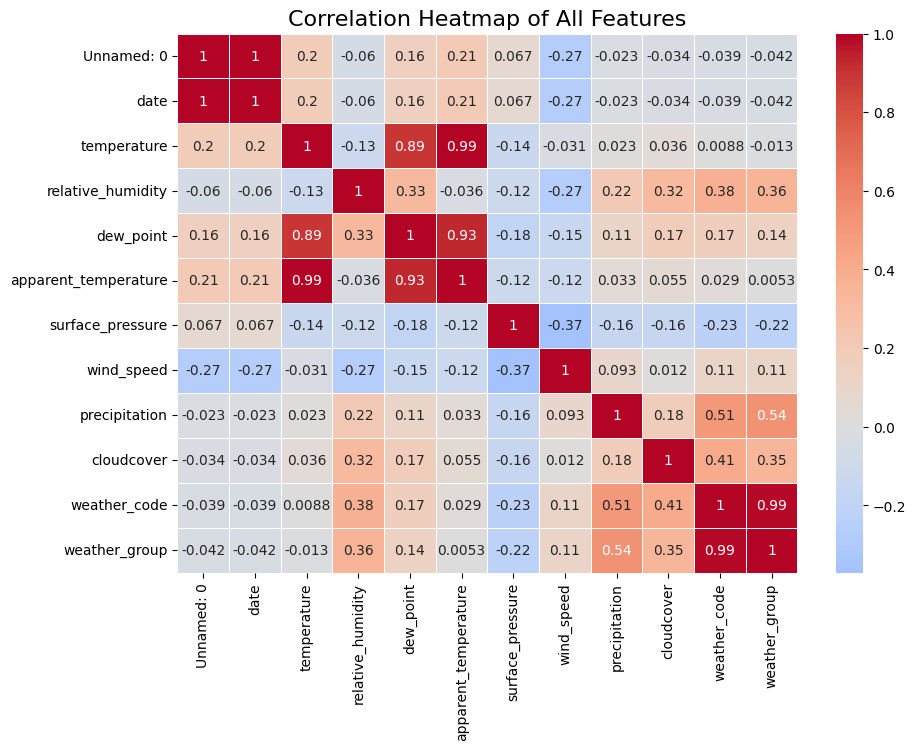

In [29]:

cor_matrix = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()

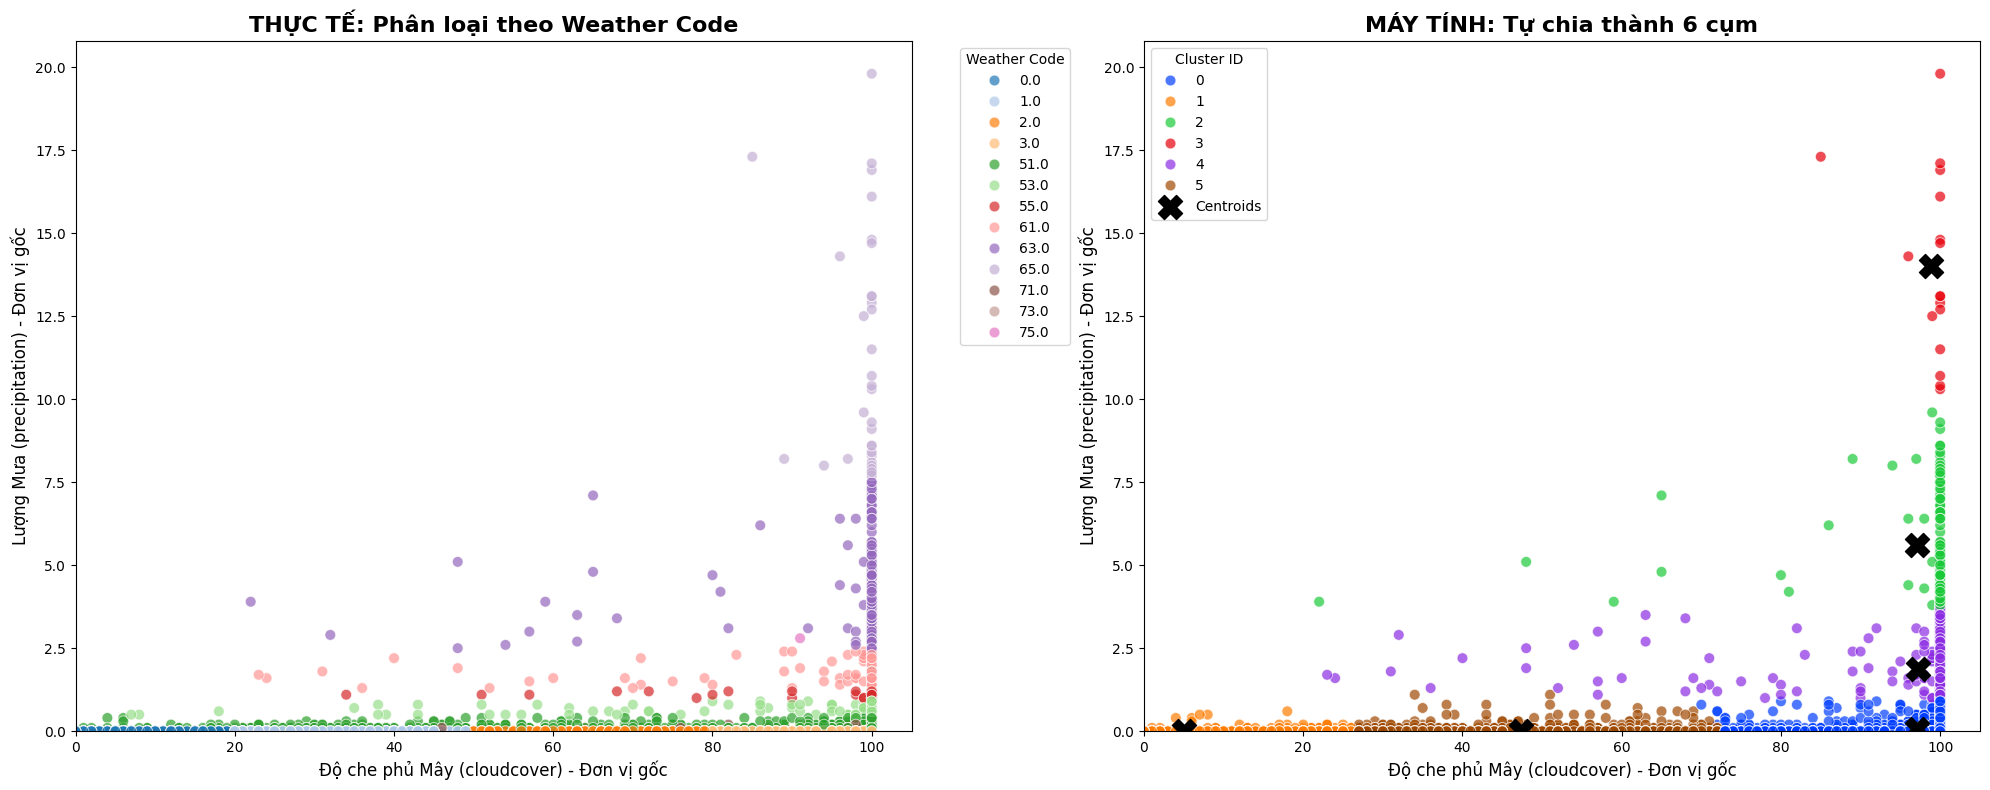

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

min_cloudcover = 0      
min_precipitation = 0   
best_k = 6 

features = ['precipitation', 'cloudcover'] 
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=best_k, random_state=42)
data['cluster_calculated'] = kmeans.fit_predict(X_scaled)

centers_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(
    x='cloudcover', y='precipitation',
    hue='weather_code', 
    palette="tab20", 
    data=data, 
    ax=axes[0],
    s=60, alpha=0.7
)
axes[0].set_title('THỰC TẾ: Phân loại theo Weather Code', fontsize=16, fontweight='bold')

axes[0].set_xlim(min_cloudcover, None) 
axes[0].set_ylim(min_precipitation, None) 

axes[0].set_xlabel('Độ che phủ Mây (cloudcover) - Đơn vị gốc', fontsize=12) 
axes[0].set_ylabel('Lượng Mưa (precipitation) - Đơn vị gốc', fontsize=12) 
axes[0].legend(title='Weather Code', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(
    x='cloudcover', y='precipitation', 
    hue='cluster_calculated', 
    palette="bright", 
    data=data, 
    ax=axes[1],
    s=60, alpha=0.7
)
axes[1].set_title(f'MÁY TÍNH: Tự chia thành {best_k} cụm', fontsize=16, fontweight='bold')

axes[1].set_xlim(min_cloudcover, None) 
axes[1].set_ylim(min_precipitation, None) 

axes[1].set_xlabel('Độ che phủ Mây (cloudcover) - Đơn vị gốc', fontsize=12) 
axes[1].set_ylabel('Lượng Mưa (precipitation) - Đơn vị gốc', fontsize=12) 

axes[1].scatter(
    centers_unscaled[:, 1], 
    centers_unscaled[:, 0], 
    c='black', 
    s=300, 
    marker='X', 
    label='Centroids'
)
axes[1].legend(title='Cluster ID')

plt.tight_layout()
plt.show()

In [31]:
for cluster_id in sorted(data['cluster_calculated'].unique()):
    subset = data[data['cluster_calculated'] == cluster_id]
    most_common_code = subset['weather_code'].mode()[0]
    
    print(f" Cụm {cluster_id}  ->  Weather Code: {most_common_code}")

 Cụm 0  ->  Weather Code: 3.0
 Cụm 1  ->  Weather Code: 0.0
 Cụm 2  ->  Weather Code: 63.0
 Cụm 3  ->  Weather Code: 65.0
 Cụm 4  ->  Weather Code: 61.0
 Cụm 5  ->  Weather Code: 1.0


In [32]:
for i, center in enumerate(centers_unscaled):
    mua = center[0]  
    may = center[1]  
    print(f" Cụm {i}: Mưa = {mua:.4f} mm/h  |  Mây = {may:.2f} %")

df_centers = pd.DataFrame(centers_unscaled, columns=features)
df_centers.index.name = 'Cluster ID'
print(df_centers)

 Cụm 0: Mưa = 0.0655 mm/h  |  Mây = 97.14 %
 Cụm 1: Mưa = 0.0012 mm/h  |  Mây = 5.04 %
 Cụm 2: Mưa = 5.5946 mm/h  |  Mây = 97.04 %
 Cụm 3: Mưa = 14.0118 mm/h  |  Mây = 98.82 %
 Cụm 4: Mưa = 1.8594 mm/h  |  Mây = 97.24 %
 Cụm 5: Mưa = 0.0161 mm/h  |  Mây = 47.34 %
            precipitation  cloudcover
Cluster ID                           
0                0.065536   97.144040
1                0.001151    5.040347
2                5.594643   97.035714
3               14.011765   98.823529
4                1.859400   97.244000
5                0.016116   47.339544


In [39]:
from sklearn.preprocessing import LabelEncoder
selected_columns = ['temperature','precipitation', 'cloudcover']
data['weather_code'] = pd.to_numeric(data['weather_code'], errors='coerce')
df_subset = data[data['weather_code'].isin([55,61])][selected_columns].copy()

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
cat_col = df_subset.select_dtypes(include=['object']).columns

for var in cat_col:
    df_subset[var] = encode.fit_transform(df_subset[var])
df_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,359.0,13.757180,7.921442,-1.9275,7.1725,13.1225,20.6225,34.2225
precipitation,359.0,1.501671,0.402086,1.0000,1.2000,1.4000,1.8000,2.4000
cloudcover,359.0,96.841226,11.441856,23.0000,100.0000,100.0000,100.0000,100.0000


In [34]:
from sklearn.preprocessing import LabelEncoder
selected_columns = ['temperature','precipitation', 'cloudcover']
data['weather_code'] = pd.to_numeric(data['weather_code'], errors='coerce')
df_subset = data[data['weather_code'].isin([51,53])][selected_columns].copy()

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
cat_col = df_subset.select_dtypes(include=['object']).columns

for var in cat_col:
    df_subset[var] = encode.fit_transform(df_subset[var])
df_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,1645.0,15.114354,8.437564,-1.6275,7.8725,15.4225,22.0725,36.7725
precipitation,1645.0,0.301398,0.228779,0.1000,0.1000,0.2000,0.4000,0.9000
cloudcover,1645.0,91.792097,20.458981,1.0000,100.0000,100.0000,100.0000,100.0000


✅ Đã lọc được 195 dòng dữ liệu.


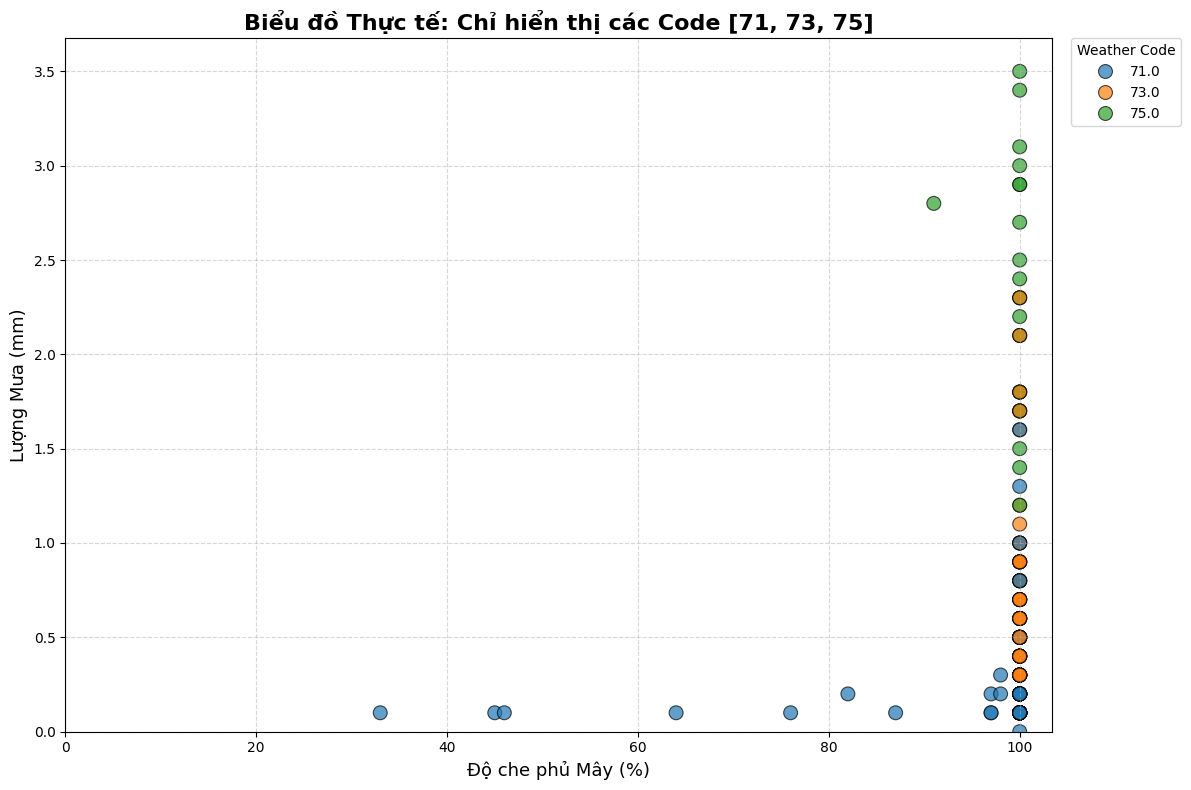

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

target_codes = [71,73,75] 
min_cloudcover = 0      
min_precipitation = 0   
data['weather_code'] = pd.to_numeric(data['weather_code'], errors='coerce')
filtered_data = data[data['weather_code'].isin(target_codes)].copy()

if filtered_data.empty:
    print("⚠️ Cảnh báo: Không tìm thấy dữ liệu nào khớp với các mã code bạn chọn!")
else:
    print(f"✅ Đã lọc được {len(filtered_data)} dòng dữ liệu.")

    plt.figure(figsize=(12, 8)) 

    sns.scatterplot(
        x='cloudcover', 
        y='precipitation',
        hue='weather_code', 
        palette="tab10",  
        data=filtered_data, 
        s=100,      
        alpha=0.7, 
        edgecolor='k' 
    )

    plt.title(f'Biểu đồ Thực tế: Chỉ hiển thị các Code {target_codes}', fontsize=16, fontweight='bold')
    
    plt.xlim(min_cloudcover, None) 
    plt.ylim(min_precipitation, None) 

    plt.xlabel('Độ che phủ Mây (%)', fontsize=13) 
    plt.ylabel('Lượng Mưa (mm)', fontsize=13) 
    
    plt.legend(title='Weather Code', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder
selected_columns = ['temperature','precipitation', 'cloudcover']
data['weather_code'] = pd.to_numeric(data['weather_code'], errors='coerce')
df_subset = data[data['weather_code'].isin([71,73,75])][selected_columns].copy()

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
cat_col = df_subset.select_dtypes(include=['object']).columns

for var in cat_col:
    df_subset[var] = encode.fit_transform(df_subset[var])
df_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,195.0,-1.071090,2.342365,-10.1275,-2.2525,-1.2775,0.5725,6.0725
precipitation,195.0,0.634872,0.755198,0.0000,0.1000,0.3000,0.8000,3.5000
cloudcover,195.0,98.517949,8.021456,33.0000,100.0000,100.0000,100.0000,100.0000
